# SER-SAG Periodicity Pipeline (LSST in-kind contribution project)






### Import libraries and create artifical LC to test the module

In [1]:
import sys
# Import from local diroctory, the repository will be available on PIP as a final version
sys.path.insert(0, '/home/viktor/Documents/LSST/MAF/inkind/baseperiodicity')
from periodicity import *

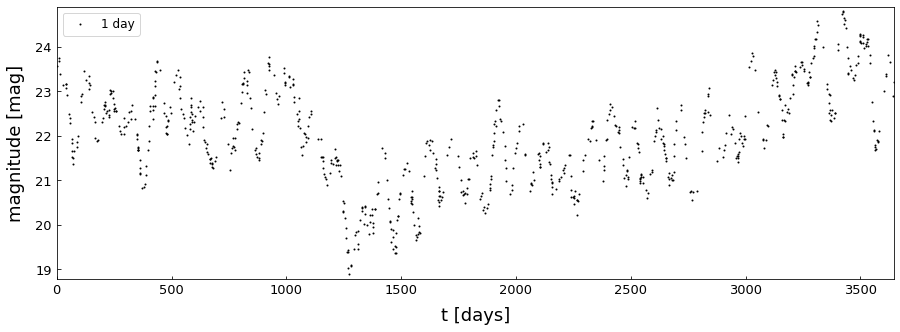

In [2]:
# Creating of a mock signal LC with frequency of 100 days, amplitude of 0.3
# Plot is created using functions in the utils subpackage
period = 100  #days
amplitude = 0.3

# Functions uses time interval in years, number of points, period, ampltude as main arguments
tt, yy = simple_mock_lc(time_interval = 10, num_points = 1000, 
                                    frequency = period, amplitude = amplitude, percent = 0.2, magnitude = 22)
fig_plot(tt, yy)

# Periodicity determination using WWZ

## ✨WWZ-Weighted Wavelet Z-transform**

Foster, G., *Wavelets for period analysis of unevenly sampled time series*, Astronomical Journal v.112, p.1709-1729,  doi: 10.1086/118137

Data cadence: irregular


The method, projects the data on the basis  u cos $[ω(t − τ)], sin [ω(t − τ)]$ and the constant function $I(t) = 1$. The projection in addition uses weights of the form $exp (−cω^{2}(t − τ)^{2})$, with c being a tunable parameter.


Tuning constant  $c$ used
to adjust the width of the window can be $c = 0.0125$, as originally proposed in Foster (1996), for improved time resolution on shorter segments of the data. 
Second, c can have values up to 0.005, used for the entire data set to improve frequency resolution. This translates to the wavelet decaying by $e−1$ in ∼1.4 cycles in the first case and ∼2.4 cycles in the second case. 
The values can be compared to e.g. c = 0.001 used in Templeton, Mattei & Willson (2005) and Young et al. (2012), for longer data sets than the one used here.



In [3]:
# In order to perform our analysis we need to apply hybrid2d method 
# Input parametars are time data, magnitude data and parameteres for WWZ transformation, ntau, ngrid - grid size
# As output main products are wwz matrix and autocorrelation matrix of wwz
wwz_matrx, corr, extent = hybrid2d(tt, yy, 80, 800)

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.314
largest tau window is  46.144
40.06 seconds has passed to complete Weighted Wavelet Z-transform 



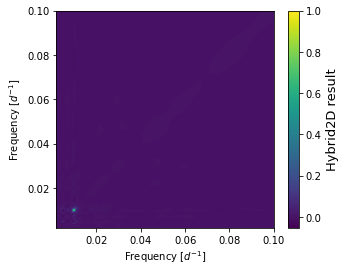

In [4]:
# Plotting wwz matrix heatmap
# Note how er can easly spot detected period
plt_freq_heatmap(corr, extent)

## Finding the error of the detected period
**Reference:**
Schwarzenberg-Czerny, A., 1991, Mon. Not. R. astr. Soc., 253, 198-206

The period uncertainty method of Schwarzenberg-Czerny requires the so called Mean Noise Power Level (MNPL) in the vicinity of P. The 1-sigma confidence interval on P then is equal to the width of the line at the P – MNPL level. This method is a so-called ‘post-mortem analysis’.
To find the MNPL we detect FWHM of the peak and then use mquantile method to detect points between 25th and 75th quantile 

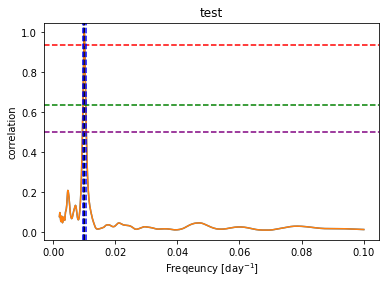

In [5]:
# Function for calculations of periods
r_periods, up, low = periods ('test', corr, 800, plot=True, save=True)

# Blue vertical lines represent the border of a half width of a peak
# Green and red horizontal lines represent the calculated values of a quantiles
# Purple line is a calculated value of half width of a peak

In [8]:
# Write down obtained results 
for j in range(len(r_periods)):
    print("Period: %6.3f, upper error : %5.2f  lower error : %5.2f"% (r_periods[j], up[j], low[j]) )
        

Period: 100.376, upper error :  3.65  lower error :  1.58


##⚡ **Significance of detected period based on Johnson et al (faster approach)**

The dates of all observations and magnitudes were shuffled; the period  was recomputed over this new modified data set and the power of the maximum peak in this uncorrelated data set was compared to that of the original simulated data. This process was repeated N(100) times and the significance level was then determined as 
\begin{align}
σ=\frac{x}{N}⁠
\end{align}

where x represents the number of times that the peak power of the period in the original data was greater than that of the uncorrelated ensemble and N is the total number of shuffles. This formula therefore has a maximum of 1, corresponding to a 100 per cent recovery rate. 

**Reference**

Michael A. C. Johnson, Poshak Gandhi, Adriane P. Chapman, Luc Moreau, Philip A. Charles, William I. Clarkson and Adam B. Hill, *Prospecting for periods with LSST – low-mass X-ray binaries as a test case*, 2019, MNRAS, Volume 484, https://doi.org/10.1093/mnras/sty3466 



In [10]:
# Determine significance
number_of_lcs = 10  # Number of LCs used for a simulation
peak_of_interests = 0 # For wich peak we calculate significance
bins, bins11, sig, siger = signif_johnoson(number_of_lcs, peak_of_interests ,corr, tt, yy, 80,800)

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.314
largest tau window is  46.144
34.37 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.314
largest tau window is  46.144
43.44 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.314
largest tau window is  46.144
57.98 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.314
largest tau window is  46.144
53.1 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.314
largest tau window is  46.144
42.71 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample 

In [11]:
sig, siger

(1.0, 0.0)

Text(0.5, 1.0, 'correlation peak for artificial curves')

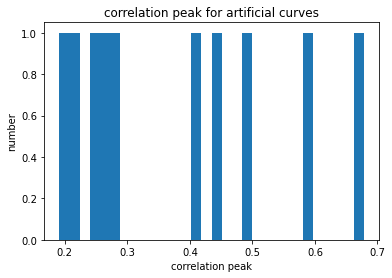

In [12]:
plt.hist(bins,30)
bins=np.array(bins)
plt.xlabel('correlation peak')
plt.ylabel('number')
plt.title('correlation peak for artificial curves')